# COMP0114 Inverse Problems in Imaging. Coursework 1
## 1. Solving Underdetermined Problems
a) Write a function of two variables, x and p, to compute the value of Φ as given above.

In [1]:
import numpy as np
import scipy.optimize as spo
import scipy
import matplotlib.pyplot as plt

In [2]:
def phi(x2,p):
    """
    Inputs:
        x2 is one element of a vector of length 2 (x1,x2)
        p is a scalar
    Returns:
        phi    
    """
    Sum = (np.abs(5-2*x2))**p + (np.abs(x2))**p
    
    return Sum

b)Use library functions to compute solutions of the above optimization problem

In [3]:
p_list = np.arange(1,4.5,0.5)
x_start = 9
x1 = []
x2 = []
y = []
for p_i in p_list:
    result = spo.minimize(phi,x_start,args=p_i)
    if result.success:
        x1.append(list(5-2*result.x))
        x2.append(list(result.x))
        y.append(result.fun)
        print(f"when p = {p_i} x={(list(5-2*result.x),list(result.x))} y = {result.fun}")

when p = 1.0 x=([2.2351741790771484e-08], [2.499999988824129]) y = 2.500000011175871
when p = 1.5 x=([0.5555566042412448], [2.2222216978793776]) y = 3.726779962500272
when p = 2.0 x=([0.9999995008103717], [2.000000249594814]) y = 5.000000000000312
when p = 2.5 x=([1.1976615735037677], [1.9011692132481162]) y = 6.553467806802202
when p = 3.0 x=([1.3060193930427793], [1.8469903034786104]) y = 8.528433037009236
when p = 3.5 x=([1.3739978884128101], [1.813001055793595]) y = 11.064585668127403
when p = 4.0 x=([1.4205182909810472], [1.7897408545094764]) y = 14.33212122809243


c) Plot the solutions you have obtained as points on a 2D graph together with the line representing the constraint equation.

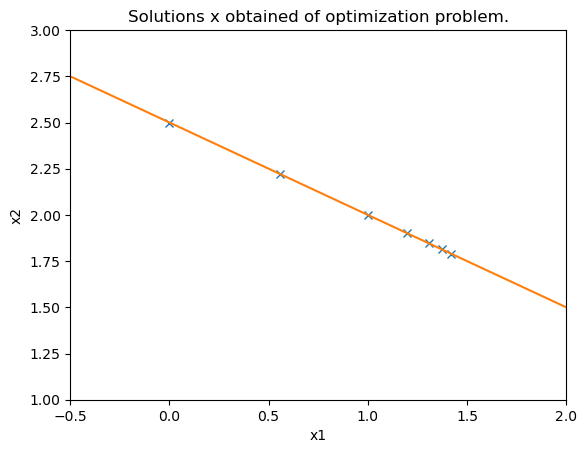

In [4]:
plt.plot(x1,x2,'x',label = 'solution x')
plt.plot(np.array([-0.5,5]),np.array([2.75,0]), label = 'constraint equation of x')
plt.axis([-0.5,2,1,3])
plt.title('Solutions x obtained of optimization problem.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

d) use the Moore-Penrose generalised inverse
$$A^\dagger:=A^\intercal(AA^\intercal)^{-1}$$

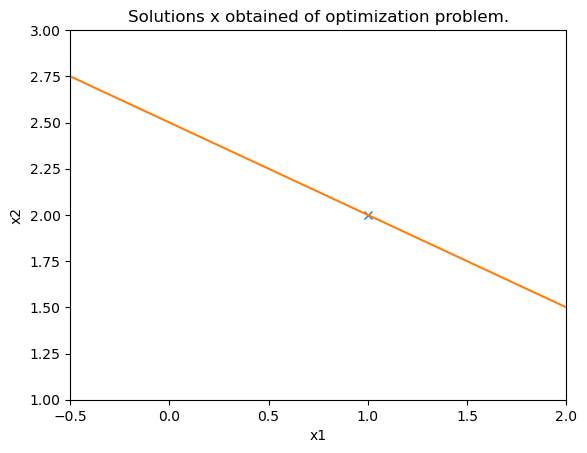

In [5]:
A = np.matrix([1,2])
b = 5
A_con = A.T*((A*A.T)**(-1))
x_MP = A_con * b
plt.plot(x_MP[0],x_MP[1],'x',label = 'solution x')
plt.plot(np.array([-0.5,5]),np.array([2.75,0]), label = 'constraint equation of x')
plt.axis([-0.5,2,1,3])
plt.title('Solutions x obtained of optimization problem.')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## 2. Singular Value Decomposition
a) Set up a spatial grid on the interval $[−1,1]$ in $n$ equally spaced steps of size $δn$.

In [6]:
def grid(n):
    g = np.linspace(-1,1,n)
    return g

b) Create a vector of values of the Gaussian function centred at $µ = 0$ with $σ = 0.2$, given by
$$G(x) = \frac{δn}{\sqrt{2π}σ}exp(−\frac{(x−µ)^2}{2σ^2})$$ 
and plot it.

In [7]:
sigma = 0.2
miu = 0
def Gaussian(X,sigma,miu):
    G = []
    for x in X:
        dn = 2/(len(X)-1)
        G.append((dn/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((x-miu)**2)/(2*sigma**2)))
    return G


Text(0, 0.5, 'Gaussian G(x)')

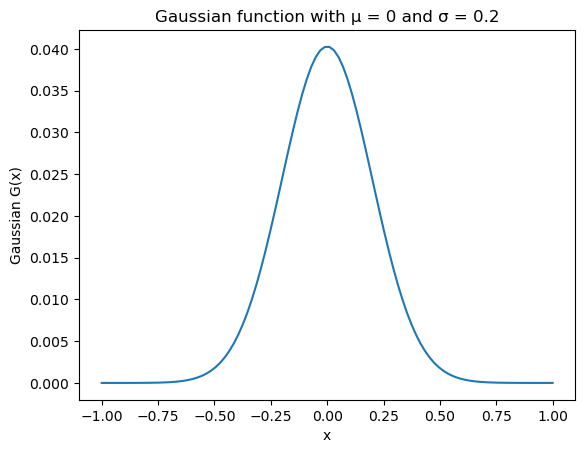

In [8]:
n = 100
X = grid(n)
plt.plot(X,Gaussian(X,sigma,miu))
plt.title('Gaussian function with µ = 0 and σ = 0.2')
plt.xlabel('x')
plt.ylabel('Gaussian G(x)')

c) Create the convolution matrix of size $n × n$ with entries
$$A_{i,j} = G(x_i −x_j) = \frac{δn}{\sqrt{2π}σ}exp(−\frac{(x_i−x_j)^2}{2σ^2})$$

In [9]:
def Convolution_Matrix(n,sigma):
    M = np.zeros((n,n))
    dn = 2/(n-1)
    X = grid(n)
    for i in range(n):
        for j in range(n):
            M[i,j] = ((dn/(np.sqrt(2*np.pi)*sigma)) * np.exp(-((X[i]-X[j])**2)/(2*sigma**2)))
    return M

d) Plot the matrix $A$ as an image, where $A$ is considered as a 2D-array for the case $n = 100$.

In [10]:
import cv2 
import numpy as np 
A = Convolution_Matrix(100,sigma)
Atmp = np.array(np.ceil(A/np.max(A)*256), dtype = np.uint8) 
Aimg = cv2.applyColorMap(Atmp, cv2.COLORMAP_JET) 
cv2.imwrite("ConvolutionMatrix.png",Aimg)

True

e) Compute the SVD of matrix $A$ using library functions. 

* Obtain three matrices $U$, $W$, $V$, where $W$ is a diagonal matrix of same size as $A$ containing the singular values. 
* Verify that the equation $A = UWV^T$ is satisfied.

In [11]:
U,W,V_T = np.linalg.svd(A)
# print(U.shape, W.shape, V_T.shape)
norm = np.linalg.norm(A - U * W @ V_T)
if np.allclose(A , U * W @ V_T):
    print('Matrix A and UWV_T are element-wise equal within a tolerance:', norm)

Matrix A and UWV_T are element-wise equal within a tolerance: 2.434181540759949e-15


f) Compute the pseudoinverse $A^†$ of $A$ by using the formula $A^† = VW^†U^T$ as given in lectures. 
* Create a method for constructing $W^†$.
* For the case $n = 10$, check that this has the property $WW^† = W^†W = Id_n$ where $Id_n$ is the $n×n$ Identity matrix.
* Check also that $AA^† = A^†A = Id_n$

In [12]:
def pseudoinverse(N,sigma):
# constructing W†
    A = Convolution_Matrix(N,sigma)
    identity_n = np.identity(N)

    U,W,V_T = np.linalg.svd(A)
    Wdiag = scipy.sparse.spdiags(W,0,A.shape[0],A.shape[1])
    # W_inv = scipy.sparse.spdiags(1/W,0,A.shape[0],A.shape[1])
    W_inv = scipy.sparse.linalg.inv(Wdiag)
    # W_inv = np.diag(1/W)
    print('When the size of marix is',N,':')
    if (Wdiag.todense() * W_inv).all() == (W_inv.todense() * Wdiag).all():
        print('Two products about W are the same.')
    else: 
        print('Two products about W are not the same.')
    if ((Wdiag.todense() * W_inv).all() == (identity_n).all()):
        print('Two products about W are identity.')

    # constructing A†
    A_inv = np.linalg.pinv(A)
    A_pinv = V_T.T * W_inv @ U.T
    # A_pinv = V_T.T * (1/W) @ U.T
    norm = (np.linalg.norm(A @ A_inv - A_inv @ A))
    norm_Apinv = np.linalg.norm(A_inv - A_pinv)
    if np.allclose(A_inv, A_pinv):
        print('Two A† is element-wise equal within a tolerance:',norm_Apinv)
    else:
        print('Two A† is not equal with a norm:',norm_Apinv)
    if np.allclose(A @ A_inv, A_inv @ A):
        print('Two products about A are element-wise equal within a tolerance:',norm)
    else:
        print('Two products about A are not equal with a norm:',norm)
    product = (A @ A_inv)
    product[product < 2*1e-15] = 0 
    if (product.all() == identity_n.all()):
        print('Two products about A are identity.')

    # plot
    plt.figure()
    plt.spy(W_inv)
    plt.title('The form of sparse matrix $W^†$')
    plt.xlabel('x')
    plt.ylabel('sparse $W^†$')

    if N == 100:
        plt.figure()
        plt.semilogy(np.diag(W))
        plt.title('plot with logarithmic scaling on the y-axis of marix $W$')
        plt.xlabel('x')
        plt.ylabel('sparse $W^†$')

        plt.figure()
        fig, axs = plt.subplots(3, 3, figsize=(12, 12))
        fig.suptitle('The first 9 columns of V')
        k = 1
        for i in range(0,3):
            for j in range(0,3):
                axs[i,j].plot(grid(100),np.array((V_T.T)[:,k-1:k]))
                axs[i,j].set_title('Column {} of matrix V'.format(k))
                k += 1
        for ax in axs.flat:
            ax.set(xlabel='x', ylabel='V')

        # Hide x labels and tick labels
        for ax in axs.flat:
            ax.label_outer()

        
        plt.figure()
        fig, axs = plt.subplots(3, 3, figsize=(12, 12))
        fig.suptitle('The last 9 columns of V')
        k = -9
        for i in range(0,3):
            for j in range(0,3):
                axs[i,j].plot(grid(100),np.array((V_T.T)[:,k-1:k]))
                axs[i,j].set_title('Column {} of matrix V'.format(k))
                k += 1
        for ax in axs.flat:
            ax.set(xlabel='x', ylabel='V')

        # Hide x labels and tick labels
        for ax in axs.flat:
            ax.label_outer()
    
    return

When the size of marix is 10 :
Two products about W are the same.
Two products about W are identity.
Two A† is element-wise equal within a tolerance: 2.8400347913994436e-15
Two products about A are element-wise equal within a tolerance: 6.819051233069157e-15
Two products about A are identity.


c:\Users\ZLiu\Anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',
c:\Users\ZLiu\Anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:239: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  warn('spsolve is more efficient when sparse b '


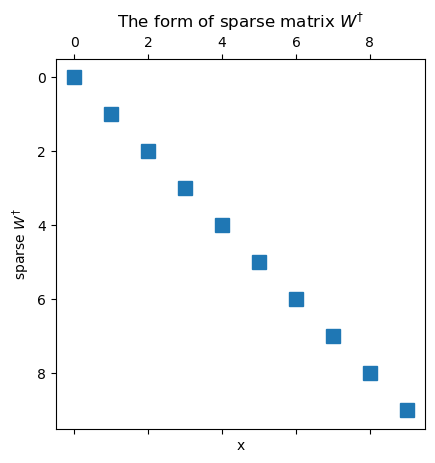

In [13]:
pseudoinverse(10,sigma)

g) Repeat the last two steps 
* For $n = 20$. What do you observe? 
* For $n = 100$ again and plot the first 9 columns of V, the last 9 columns of V, and the singular values on a logarithmic scale, i.e. log(diag(W)).

When the size of marix is 20 :
Two products about W are the same.
Two products about W are identity.
Two A† is element-wise equal within a tolerance: 3.7416236697031865e-10
Two products about A are element-wise equal within a tolerance: 3.7647095747035816e-10
Two products about A are identity.


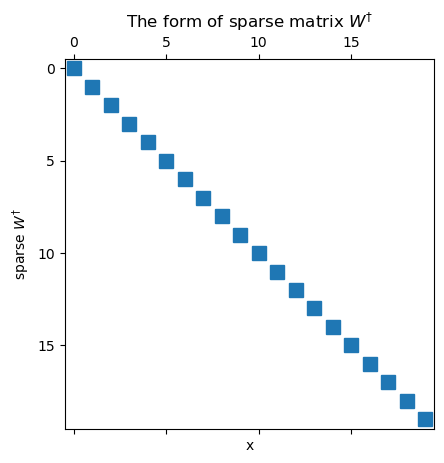

In [14]:
pseudoinverse(20,sigma)

When the size of marix is 100 :
Two products about W are the same.
Two products about W are identity.
Two A† is not equal with a norm: 1.4308362856453842e+17
Two products about A are not equal with a norm: 0.03504556669233272
Two products about A are identity.


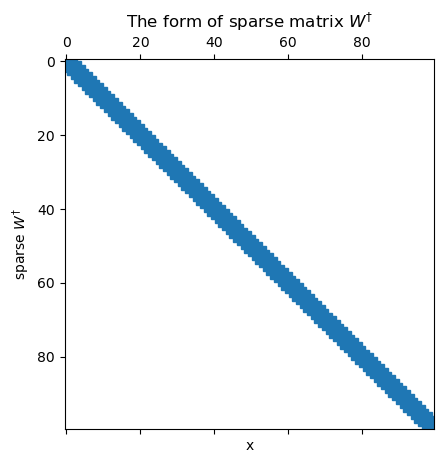

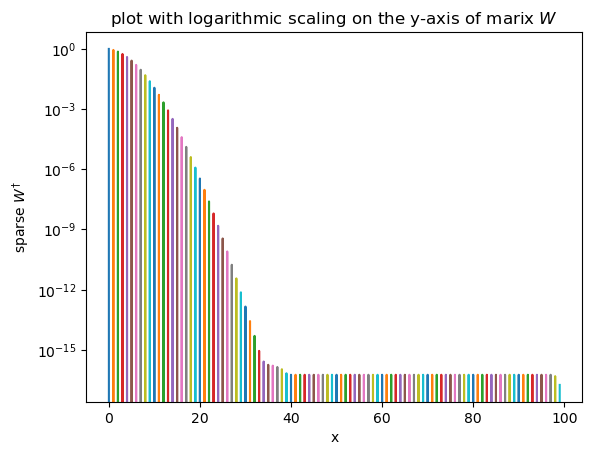

<Figure size 640x480 with 0 Axes>

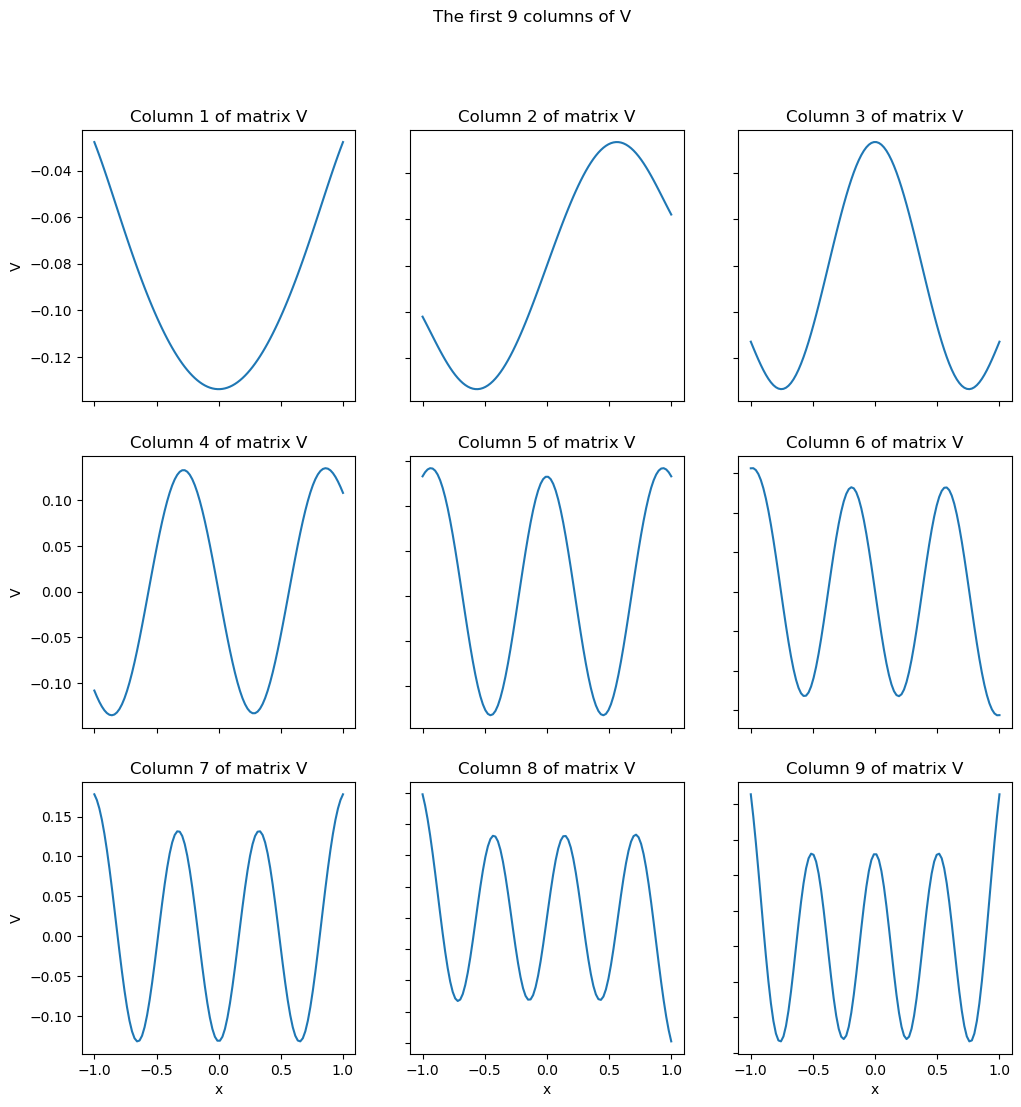

<Figure size 640x480 with 0 Axes>

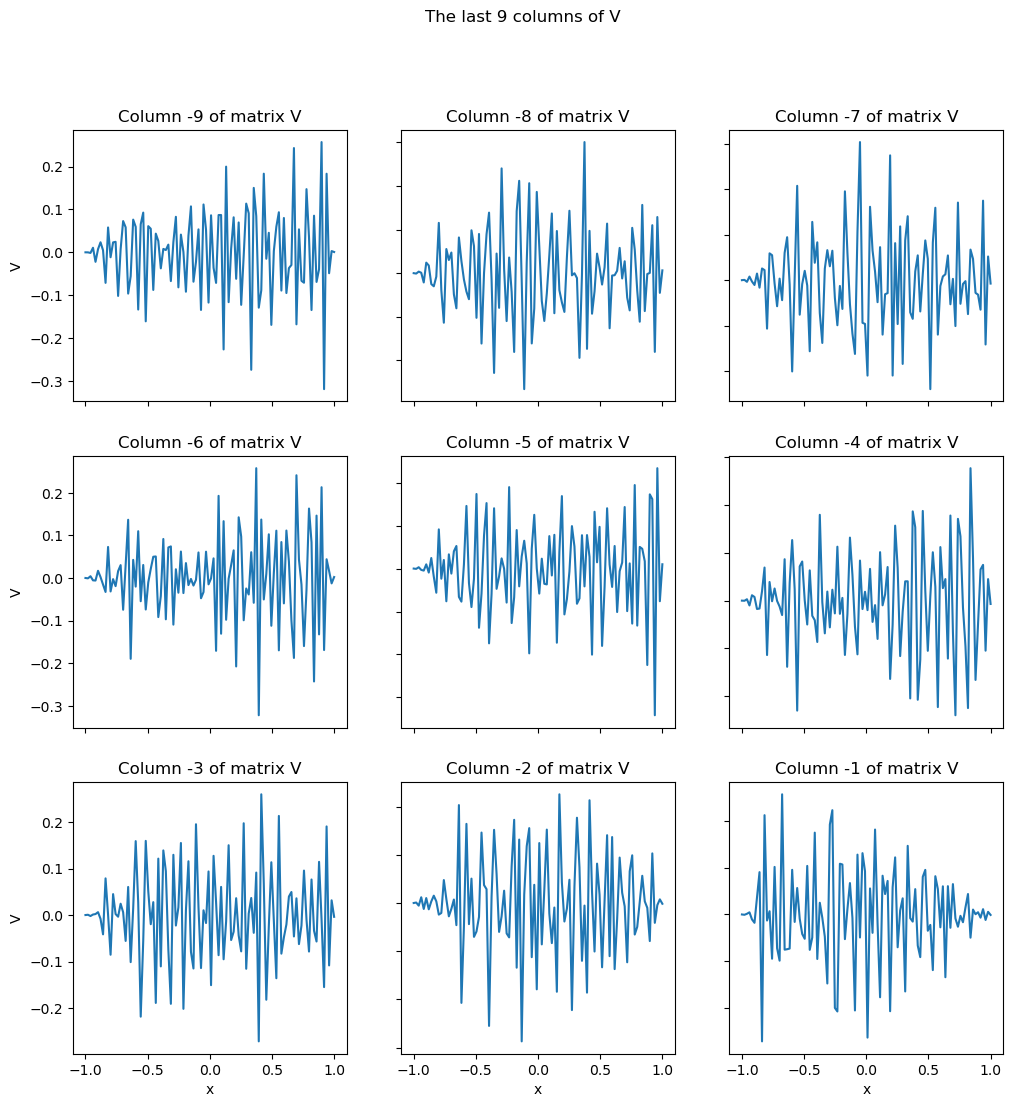

In [15]:
pseudoinverse(100,sigma)

## 3. Convolutions and Fourier transform
a) Create a step function $f(x)$ defined by
$$f(x) = χ_{(−0.95,−0.6]}(x) + 0.2χ_{(−0.6,−0.2]}(x) − 0.5χ_{(−0.2,0.2]}(x) + 0.7χ_{(0.4,0.6]}(x) − 0.7χ_{(0.6,1]}(x)$$
where $χ(x)$ of an interval (a,b] is defined by
$$ χ(x) =
  \begin{cases}
    1       & \quad \text{for } a <x≤b \\
    0       & \quad \text{otherwise } 
  \end{cases}.
$$

In [16]:
def f(x):
    chi1 = lambda x : 1 if -0.95 < x <= -0.6 else 0;
    chi2 = lambda x : 1 if -0.6 < x <= -0.2 else 0;
    chi3 = lambda x : 1 if -0.2 < x <= 0.2 else 0;
    chi4 = lambda x : 1 if 0.4 < x <= 0.6 else 0;
    chi5 = lambda x : 1 if 0.6 < x <= 1 else 0;
    result = chi1(x) + 0.2*chi2(x) - 0.5*chi3(x) + 0.7*chi4(x) - 0.7*chi5(x)
    return result

And plot it on a grid on the interval [−1,1].

Text(0, 0.5, 'f(x)')

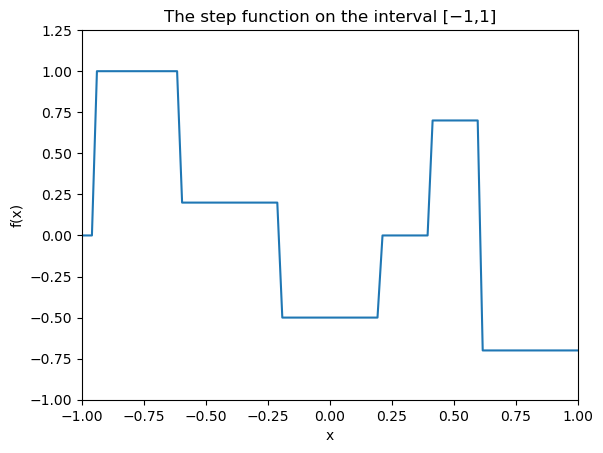

In [17]:
n = 100
X = np.linspace(-1,1,n)
F = []
for x in X:
    F.append(f(x))
plt.plot(X,F)
plt.title('The step function on the interval [−1,1]')
plt.xlabel('x')
plt.axis([-1,1,-1,1.25])
plt.ylabel('f(x)')

b.) Compute the matrix A as in part 2 for σ = 0.05, 0.1, 0.2 and plot the singular values.

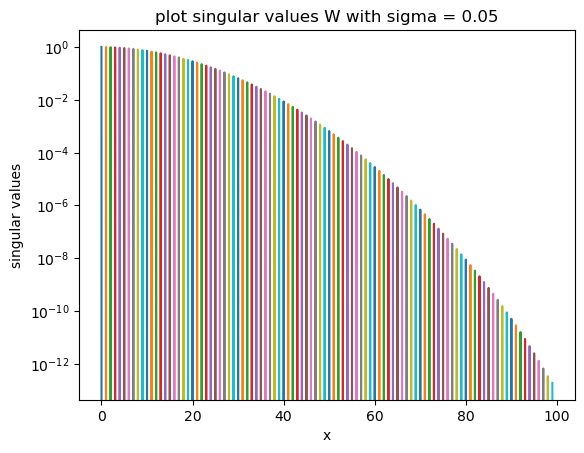

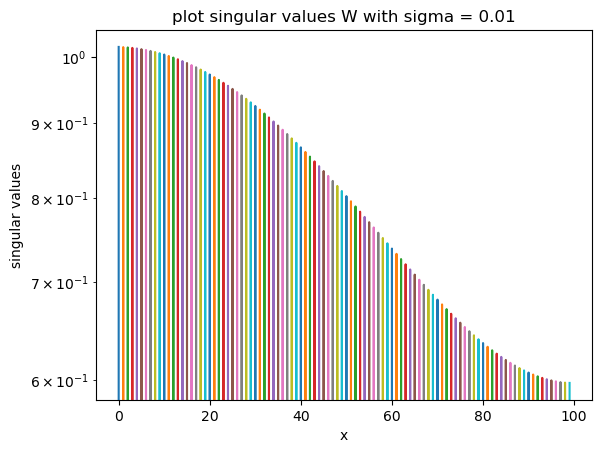

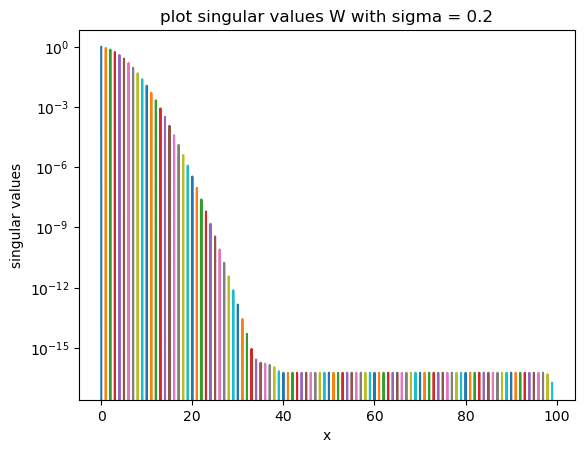

In [18]:
for sigma in (0.05,0.01,0.2):
    A = Convolution_Matrix(n,sigma)
    U,W,V_T = np.linalg.svd(A)
    plt.figure()
    plt.semilogy(np.diag(W))
    plt.title('plot singular values W with sigma = {}'.format(sigma))
    plt.xlabel('x')
    plt.ylabel('singular values')

In [19]:
a = np.arange(5)
A = np.append((-a[::-1]),a[1:])
print(a)
print(-a[::-1])
print(A)

[0 1 2 3 4]
[-4 -3 -2 -1  0]
[-4 -3 -2 -1  0  1  2  3  4]


(array([0, 1, 2, 3, 4]),
 [0.49867785050179086,
  1.8583993934178755e-06,
  9.618248283383093e-23,
  6.9133869373057175e-50,
  6.901185452699901e-88])

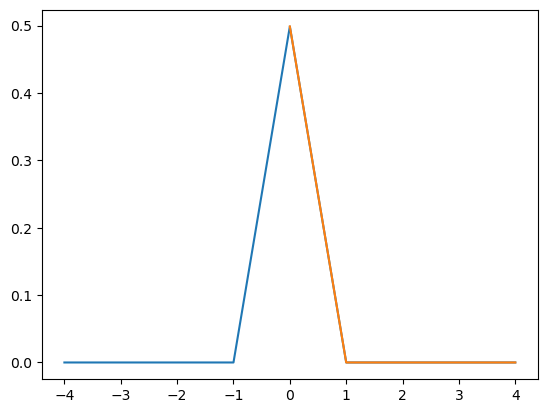

In [26]:
x = np.arange(5)
def Gaussian_simulate(x,sigma,miu):
    x_all = np.append((-x[::-1]),x[1:])
    G = Gaussian(x_all,sigma,miu)
    x_size = int((len(x_all)+1)/2)
    # print(x_all)
    # print(G)
    # print(len(x_all))
    # print(x_size)
    plt.figure()
    plt.plot(x_all,G)
    plt.plot(x_all[-x_size:],G[-x_size:])
    return x_all[-x_size:], G[-x_size:]
Gaussian_simulate(x,0.2,0)

 When sigma = 0.05, the variance of Gaussian is [6.66570836e-05].
 When sigma = 0.1, the variance of Gaussian is [6.77037328e-05].
 When sigma = 0.2, the variance of Gaussian is [7.15376509e-05].


<Figure size 640x480 with 0 Axes>

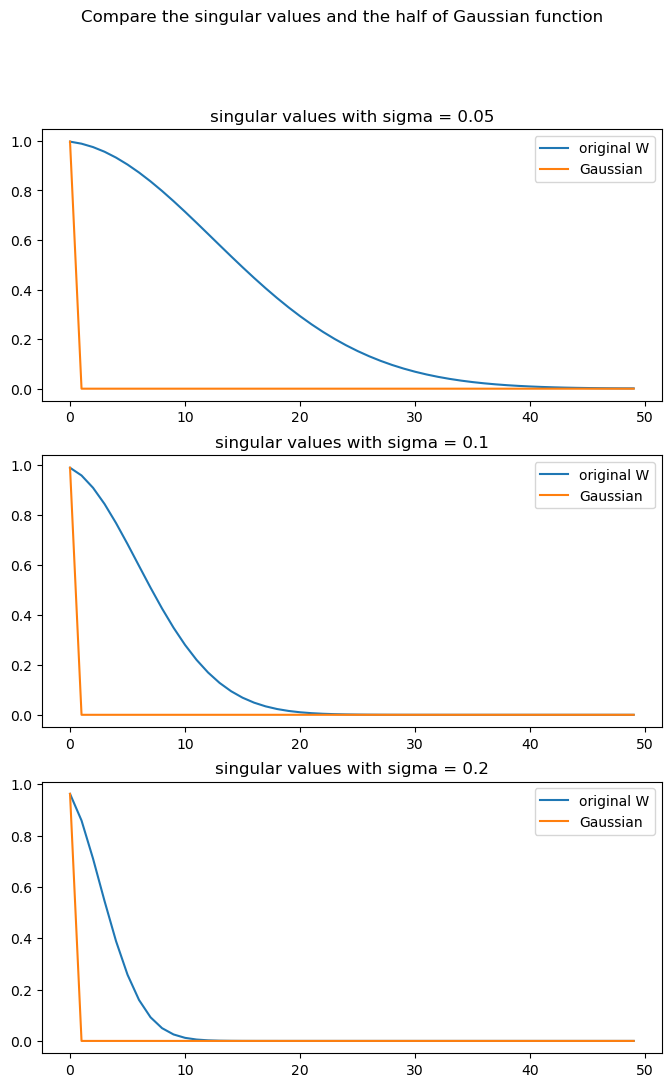

In [46]:
i = 0 # no. of plot
n = 50 # gird size
X = grid(n) #grid

# for curve_fit
def half_Gaussian(x,sigma):
    x_all = np.append((-x[::-1]),x[1:])
    G = Gaussian(x_all,sigma,0)
    x_size = int((len(x_all)+1)/2)
    return G[-x_size:]

plt.figure()
fig, axs = plt.subplots(3, 1, figsize=(8, 12))
fig.suptitle('Compare the singular values and the half of Gaussian function')
for sigma in (0.05,0.1,0.2): 
    A = Convolution_Matrix(n,sigma)
    U,W,V_T = np.linalg.svd(A)
    # curve fit x
    x = np.arange(len(W))
    # find parameter sigma,miu
    popt, pcov = scipy.optimize.curve_fit(half_Gaussian,x,W)
    # curve fit y
    y = half_Gaussian(x,popt)
    # plot
    axs[i].plot(x,W,label='original W')
    axs[i].plot(x,y,label='Gaussian')
    axs[i].set_title('singular values with sigma = {}'.format(sigma))
    axs[i].legend()
    # variance
    print(' When sigma = {}, the variance of Gaussian is {}.'.format(sigma,popt**2))
    # update the no. of plot 
    i+=1
    

d) Perform the convolution of the function $f$ with  the matrix $A$ (by matrix multiplication) for all three choices of $σ$ and plot the result.

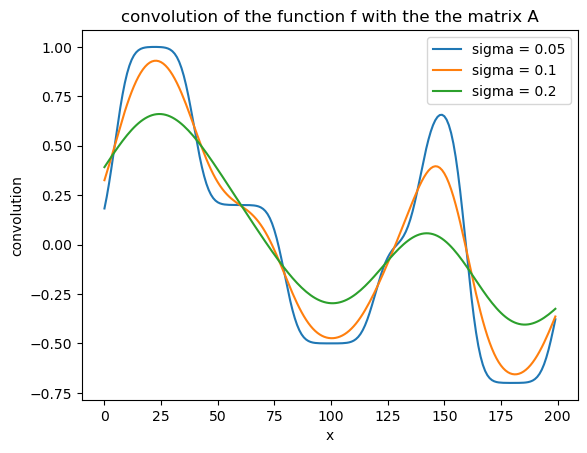

In [ ]:
X = grid(n)
F = []
for x in X:
    F.append(f(x))

for sigma in (0.05,0.1,0.2):
    A = Convolution_Matrix(n,sigma)
    b = np.dot(A, F)
    plt.plot(b, label = 'sigma = {}'.format(sigma))
    plt.title('convolution of the function f with the the matrix A')
    plt.xlabel('x')
    plt.ylabel('convolution')
    plt.legend()

e) Since convolution is equivalent to multiplication in Fourier space, perform convolution by multiplication in Fourier space for the three choices of σ and plot the result (remember to take the inverse Fourier transform); comment on any differences that you observe.